In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Uber Request Data.csv")
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [5]:
# make sure that number of duplicate rows are zero
sum(df.duplicated(subset = "Request id")) == 0

True

**let's look at the dimensions of the dataframe**

In [6]:
df.shape

(6745, 6)

**check for NA values in dataset**

In [8]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64
True
6564


**checking the % of NAs columnwise**

In [9]:
df.isnull().sum()*100/df.shape[0] 

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

**check for NA values in each columns except "Driver id" and "Drop timestamp" (Cross Verification)**

In [10]:
print (df['Request id'].isnull().values.any()) 
print (df['Request id'].isnull().values.sum())

False
0


In [11]:
print (df['Pickup point'].isnull().values.any())
print (df['Pickup point'].isnull().values.sum())

False
0


In [12]:
print (df['Status'].isnull().values.any())
print (df['Status'].isnull().values.sum())

False
0


In [13]:
print (df['Request timestamp'].isnull().values.any())
print (df['Request timestamp'].isnull().values.sum())

False
0


**convert 'Request timestamp' column to datetime oject**

In [14]:
df["Request timestamp"] = df["Request timestamp"].astype(str)
df['Request timestamp'] = df['Request timestamp'].str.replace("/", "-")
df['Request timestamp'] = pd.to_datetime(df["Request timestamp"], dayfirst=True)

In [15]:
# convert 'Drop timestamp' column to datetime oject
df["Drop timestamp"] = df["Drop timestamp"].astype(str)
df['Drop timestamp'] = df['Drop timestamp'].str.replace("/", "-")
df['Drop timestamp'] = pd.to_datetime(df["Drop timestamp"], dayfirst=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [17]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [18]:
# extract the hour from the request time
req_hour = df["Request timestamp"].dt.hour
req_hour.head()
req_hour.value_counts()
df["req_hour"] = req_hour

In [19]:
#extract the day from the request time
req_day = df["Request timestamp"].dt.day
req_day.head()
req_day.value_counts()
df["req_day"] = req_day

In [22]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "req_hour", hue = "Status", row = "req_day", data = df, kind = "count")

C:\PY\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


C:\PY\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


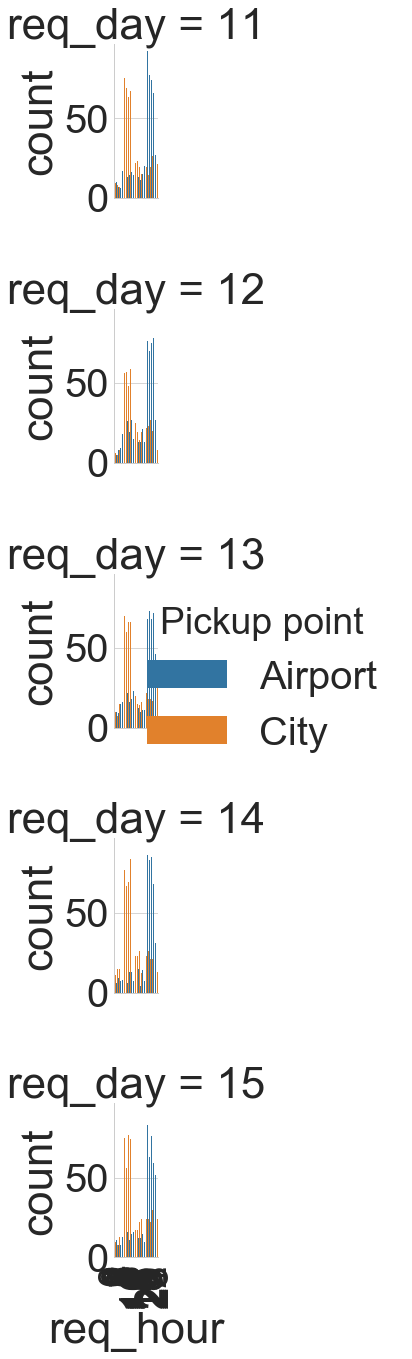

In [42]:
# factor plot of hour and day w.r.t. pickup point
plt.figure(figsize=(20,5))
sns.set_context("paper", font_scale=5.0)
sns.set_style("whitegrid")
sns.factorplot(x = "req_hour", hue = "Pickup point", row = "req_day", data = df, kind = "count")
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
# aggregate count plot for all days w.r.t. to Pickup point
sns.factorplot(x = "req_hour", hue = "Pickup point", data = df, kind = "count")

C:\PY\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


In [19]:
# creating a time slot for various time period of day
def time_period(x):
    'divide the time of the day into four categories'
    if x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

df['time_slot'] = df.req_hour.apply(lambda x: time_period(x))

In [20]:
df.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: time_slot, dtype: int64

In [21]:
# another way to look at the trips made in each time slot
Pre_Morning = print (df.time_slot[df.time_slot == "Pre_Morning"].value_counts())
Morning_Rush = print (df.time_slot[df.time_slot == "Morning_Rush"].value_counts())
Day_Time = print (df.time_slot[df.time_slot == "Day_Time"].value_counts())
Evening_Rush = print (df.time_slot[df.time_slot == "Evening_Rush"].value_counts())
Late_Night = print (df.time_slot[df.time_slot == "Late_Night"].value_counts())

Pre_Morning    578
Name: time_slot, dtype: int64
Morning_Rush    2103
Name: time_slot, dtype: int64
Day_Time    1224
Name: time_slot, dtype: int64
Evening_Rush    2342
Name: time_slot, dtype: int64
Late_Night    498
Name: time_slot, dtype: int64


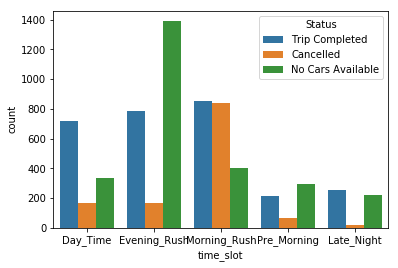

In [22]:
# plot time slot w.r.t. status and identify the most critical problems before Uber
sns.countplot(x = "time_slot", hue = "Status", data = df)

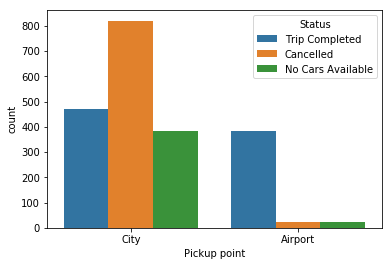

In [23]:
# as you can see in the above plot the higest number of cancellations are in the "Morning Rush" time slot
df_morning_rush = df[df.time_slot == "Morning_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_morning_rush)

In [44]:
# severity of problem by location and their count (cancellation of cab as per the pickup location @Morning Rush)
df_airport_cancelled  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Cancelled")]
len(df_airport_cancelled.index)


NameError: name 'df_morning_rush' is not defined

In [45]:
df_city_cancelled = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Cancelled")]
len(df_city_cancelled.index)

NameError: name 'df_morning_rush' is not defined

In [26]:
# let's look at the supply and demand in morning rush hour in the city
df_city_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_city_completed_morning_rush.index)

472

In [27]:
df_city_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City")]
len(df_city_morning_rush.index)

1677

In [28]:
# let's look at the supply and demand in morning rush hour at the airport
df_airport_completed_morning_rush = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "Trip Completed")]
len(df_airport_completed_morning_rush.index)

382

In [29]:
df_airport_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport")]
len(df_airport_morning_rush.index)

426

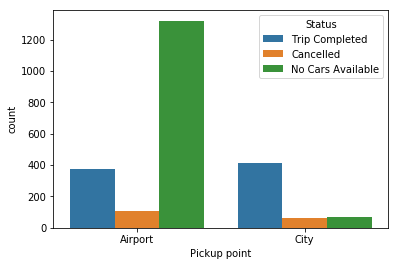

In [30]:
# let's look at the supply and demand in evening rush hour
df_evening_rush = df[df.time_slot == "Evening_Rush"]
sns.countplot(x = "Pickup point", hue = "Status", data = df_evening_rush)

In [31]:
# let's look at the supply and demand in evening rush hour in the city
df_city_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_city_completed_evening_rush.index)

411

In [32]:
df_city_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City")]
len(df_city_evening_rush.index)

542

In [33]:
# let's look at the supply and demand in evening rush hour from the airport
df_airport_completed_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Trip Completed")]
len(df_airport_completed_evening_rush.index)

373

In [34]:
df_airport_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport")]
len(df_airport_evening_rush.index)

1800

In [35]:
# let's look at the severity problem (of demand and supply) at each location by looking at cancellation of cab in each of the pickup location in evening rush
df_airport_cancelled_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "Cancelled")]
len(df_airport_cancelled_evening_rush.index)

106

In [36]:
df_city_cancelled_evening_rush = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "Cancelled")]
len(df_city_cancelled_evening_rush.index)

60

In [37]:
# severity of problem by location in Morning Rush (Unavailability of Cars)
df_airport_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "Airport") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_morning_rush.index)

21

In [38]:
df_city_unavailable_morning_rush  = df_morning_rush.loc[(df_morning_rush["Pickup point"] == "City") & (df_morning_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_morning_rush.index)

385

In [39]:
# severity of problem by location in Evening Rush (Unavailability of Cars)
df_airport_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "Airport") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_airport_unavailable_evening_rush.index)

1321

In [40]:
df_city_unavailable_evening_rush  = df_evening_rush.loc[(df_evening_rush["Pickup point"] == "City") & (df_evening_rush["Status"] == "No Cars Available")]
len(df_city_unavailable_evening_rush.index)

71

In [41]:
# Let's create pie charts instead of a count plots
def pie_chart(dataframe):
    """
    creates a pie chart
    input: dataframe with a 'category' as index and a numerical column
    output: pie chart
    """
    labels = dataframe.index.values
    sizes = dataframe['Status'].values
        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

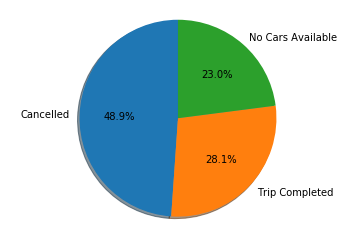

In [42]:
# percentage breakup of status on the basis of pickup location
# Status of trips @ Morning Rush where pickup point is City
df_city = df.loc[(df["Pickup point"] == "City") & (df.time_slot == "Morning_Rush")]
df_city_count = pd.DataFrame(df_city.Status.value_counts())
pie_chart(df_city_count)

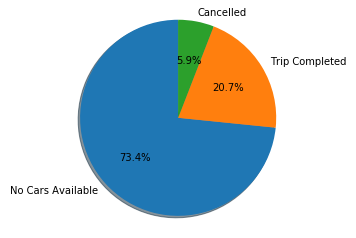

In [43]:
# Status of trips @ Evening Rush where pickup point is Airport
df_airport = df.loc[(df["Pickup point"] == "Airport") & (df.time_slot == "Evening_Rush")] 
df_airport_count = pd.DataFrame(df_airport.Status.value_counts())
pie_chart(df_airport_count)